# 1. Introduction
This is project for Assigment 2 of Data Science / COMP6200. The goal of the project is to predict the exam score by using student performance dataset. For prediction three models were used and optimazed. The reason choosing this dataset is that currently many Universities already using models to learn before exams to predict the student exam score, they are training the model with students time on the university platform and bunch of the data. 
####  1.1 Dataset : 
Dataset was choosen from Kaggle with 6607 rows data and dataset is about students perforamance and the target is to predict exam score and it is regression problem, all details of the dataset can be found in this file. Link for dataset (https://www.kaggle.com/datasets/lainguyn123/student-performance-factors/data). Also dataset will be available in assigment 2 github repository. 
There are total 20 columns and 7 of them numerical and 13 of them categorical columns. These are : 
######    - Hours_Studied :	Number of hours spent studying per week.
######    - Attendance : Percentage of classes attended.
######    - Parental_Involvement : Level of parental involvement in the student's education (Low, Medium, High).
######    - Access_to_Resources : Availability of educational resources (Low, Medium, High).
######    - Extracurricular_Activities : Participation in extracurricular activities (Yes, No).
######    - Sleep_Hours : Average number of hours of sleep per night.
######    - Previous_Scores : Scores from previous exams.
######    - Motivation_Level : Student's level of motivation (Low, Medium, High).
######    - Internet_Access : Availability of internet access (Yes, No).
######    - Tutoring_Sessions : Number of tutoring sessions attended per month.
######    - Family_Income : Family income level (Low, Medium, High).
######    - Teacher_Quality : Quality of the teachers (Low, Medium, High).
######    - School_Type : Type of school attended (Public, Private).
######    - Peer_Influence : Influence of peers on academic performance (Positive, Neutral, Negative).
######    - Physical_Activity : Average number of hours of physical activity per week.
######    - Learning_Disabilities : Presence of learning disabilities (Yes, No).
######    - Parental_Education_Level : Highest education level of parents (High School, College, Postgraduate).
######    - Distance_from_Home : Distance from home to school (Near, Moderate, Far).
######    - Gender : Gender of the student (Male, Female).
######    - Exam_Score : Final exam score.
This is refression problem because exam score are percentages, but if needed it can be changed into classification problem changing the values of exam scores into low,medium,high. 
####  1.2 Model Selection and Evaluation :
As for the requirement, I used several models for prediction the exam score of students based on the student performance dataset. First model was LinearRegression without any optimization model R2 score was 87% ,then using PolynomialFeatures increased the model LinearRegression. After that, I used RandomForestRegression as the additional model to see the prediction, as for the advanced model was choosen KNN. As for the Evaluation I used MAE, MSE and R2 score, but mostly compared each models based on the R2 score. As for the result most highest R2 score get PolynomialFeatures in LinearRegression, as for the PolynomialFeatues I used all features, it means i get all columns in the dataset and i got 99% R2 score but when i used Polynomial with RFE choosing 10 selected features it get 93% R2 score so better results was when i selected all features into train the model. Next model was RnadomForestRegressor, tihs model is fundamental model of regression problems, because of this I tried to predict using this model and the result was 87% R2 score. Next model was more advanced KNN, most of the time KNN used in classification problems but in regression problems also KNN can be used. The result of KNN model R2 score was much less than all models. 
<br> The advantage of LinearRegression is that it is simple model and it is fast to train and work well if there is linear relationship beetwen columns and target, and disadvantage of this model is depends on the dataset. if the relationship is bad then performance will be bad and to sensitive to outliners. 
<br> The advantage of Polynomial is can find non linear relationships better than LinearRegression and increase the score and for disadvantage is that it requires the scaling dataset. 
<br> The advantage of RandomForestRegressor is handless non linear relationship well and have high accuracy in many practical cases, the disadvantage is that can overfit if not tuned properly.
<br> The advantage of KNN is that it is adaptive to complez patters and the disadvantage is that it is slow for large datasets than other models.

## 2. Data Preprocessing

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [9]:
df = pd.read_csv("Student_Performance_Factors.csv") # reading the dataset
df.head() # Showing only 5 rows of the dataset

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [11]:
df.columns # Viewing the columns header

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

<br> There are total 20 columns in this dataset.

In [14]:
df.info() # Checking the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

<br> All columns datatype is different and there are 7 numerical columns and 13 categorical columns, 
<br> Later on this project, categorical columns will be changed to numerical so models can train the dataset. 

In [17]:
df.isna().sum() # Checking the missing values to each column

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

<br> There are missing values in three columns,
<br> All of the is categorical columns so it would better to use mode to fill the missing data.

In [20]:
df.isnull().sum() / len(df) # Viewing the missing values percentage based on the column

Hours_Studied                 0.000000
Attendance                    0.000000
Parental_Involvement          0.000000
Access_to_Resources           0.000000
Extracurricular_Activities    0.000000
Sleep_Hours                   0.000000
Previous_Scores               0.000000
Motivation_Level              0.000000
Internet_Access               0.000000
Tutoring_Sessions             0.000000
Family_Income                 0.000000
Teacher_Quality               0.011806
School_Type                   0.000000
Peer_Influence                0.000000
Physical_Activity             0.000000
Learning_Disabilities         0.000000
Parental_Education_Level      0.013622
Distance_from_Home            0.010141
Gender                        0.000000
Exam_Score                    0.000000
dtype: float64

<br>The missing values is not that much, 
<br> it just 1% percentage of data in the columns and it can be removed, 
<br>I dicedid to fill the missing values instead of deleting using mode.

In [23]:
missing_values_columns = ['Distance_from_Home', 'Parental_Education_Level', 'Teacher_Quality'] # All categorical columns from dataset
for column in missing_values_columns:
    df[column] = df[column].fillna(df[column].mode()[0]) # Filling missing columns values with the mode
df.isna().sum() # Checking again the missing  values

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

<br> Filled the data to missing rows using mode. 

In [26]:
df.describe() # Info about dataset

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


<br> Next step will be identifing the outliners in mumerical columns and removing that.

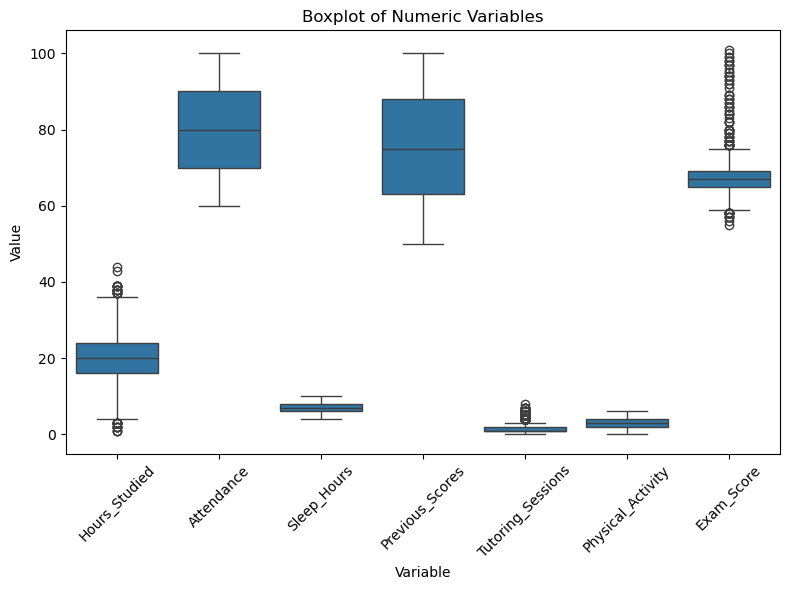

In [29]:
df_box = df.melt(value_vars=['Hours_Studied', 'Attendance', 'Sleep_Hours','Previous_Scores','Tutoring_Sessions','Physical_Activity','Exam_Score'], var_name='Variable', value_name='Value') # Boxplot 
plt.figure(figsize=(8, 6))  # Adjust the width and height as needed
sns.boxplot(x='Variable', y='Value', data=df_box)
plt.title('Boxplot of Numeric Variables')
plt.xticks(rotation=45)  # Optional: Rotate x-labels if overlapping
plt.tight_layout()       # Adjusts layout to avoid clipping
plt.show()

<br> There are outliners only in three columns which are : 
<br>  - Hours Studied
<br>  - Tutoring Sessions 
<br>  - Exam Score 
<br> These outliners I decided to remove from the dataset.

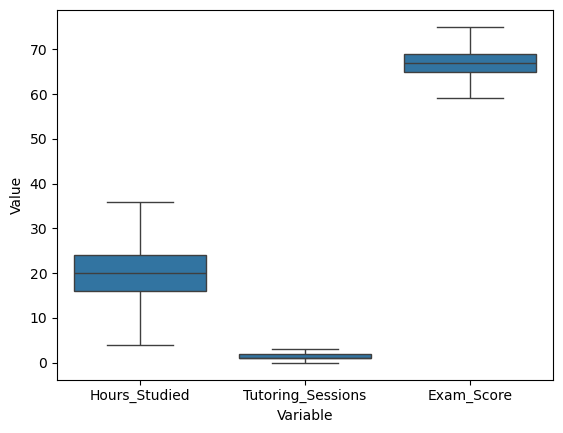

In [32]:
outliner_columns = ['Hours_Studied','Tutoring_Sessions','Exam_Score']
def outliners(df, columns): # The funcation to remove the outliners
    for col in columns:
        Q1 = df[col].quantile(0.25) # First Quartile
        Q3 = df[col].quantile(0.75) # Third Quartile
        IQR = Q3 - Q1 # Finding Internal Quartile Range
        lower = Q1 - 1.5 * IQR # Lower value
        upper = Q3 + 1.5 * IQR # Highest value
        df = df[(df[col] >= lower) & (df[col] <= upper)]
    return df
df = outliners(df, outliner_columns)
df_box = df.melt(value_vars=['Hours_Studied', 'Tutoring_Sessions', 'Exam_Score'], var_name='Variable', value_name='Value')
sns.boxplot(x='Variable', y='Value', data=df_box) # Viewing the boxplot after removing outliners
plt.show()

<br> After removing the outliners in these 3 columns box look good.


<br> Next step will be checking the categorical columns, 
<br> the values "nan","NaN, "", " " etc. 
<br> and replecing it with mode value of the columns.

In [36]:
categorical_columns = [
    'Parental_Involvement',  
    'Access_to_Resources',
    'Extracurricular_Activities',
    'Motivation_Level',
    'Internet_Access',
    'Family_Income',
    'Teacher_Quality',
    'School_Type',
    'Peer_Influence',
    'Learning_Disabilities',
    'Parental_Education_Level',
    'Distance_from_Home',
    'Gender'
]
values = ['nan', 'NaN', 'None', '', ' ', 'null'] # Searching the values in columns to remove
for x in categorical_columns:
    print(df[x].isin(values).value_counts())

Parental_Involvement
False    6054
Name: count, dtype: int64
Access_to_Resources
False    6054
Name: count, dtype: int64
Extracurricular_Activities
False    6054
Name: count, dtype: int64
Motivation_Level
False    6054
Name: count, dtype: int64
Internet_Access
False    6054
Name: count, dtype: int64
Family_Income
False    6054
Name: count, dtype: int64
Teacher_Quality
False    6054
Name: count, dtype: int64
School_Type
False    6054
Name: count, dtype: int64
Peer_Influence
False    6054
Name: count, dtype: int64
Learning_Disabilities
False    6054
Name: count, dtype: int64
Parental_Education_Level
False    6054
Name: count, dtype: int64
Distance_from_Home
False    6054
Name: count, dtype: int64
Gender
False    6054
Name: count, dtype: int64


<br> There are no any NaN or nan values in columns.

In [39]:
df.head() # 5 Rows of the dataset

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


## 3. Exploratory Data Analysis (EDA) and Data Preprocessing

<br> Beofre starting working with model, 
<br> it would be good to look correlation and change categorical columns into numerical.

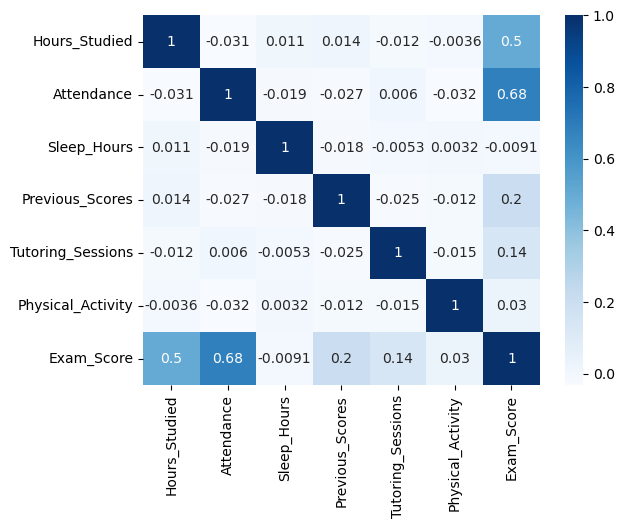

In [43]:
sns.heatmap(df.corr(numeric_only = True), cmap="Blues", annot=True) # Correlation of numeric columns 
plt.show()

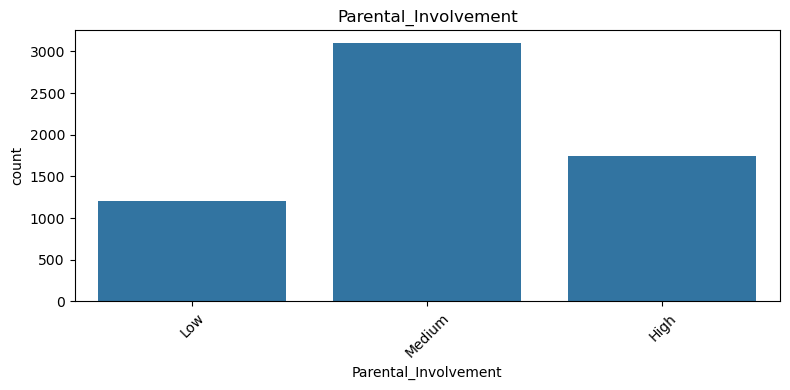

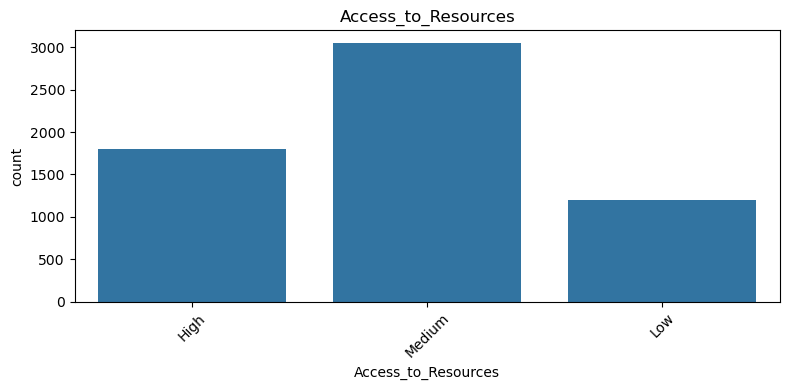

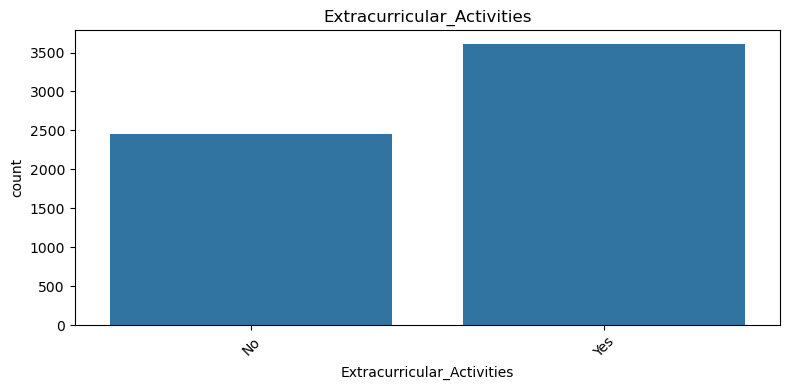

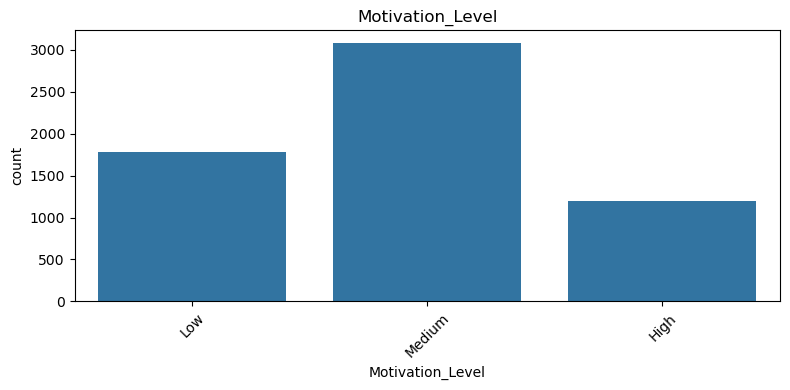

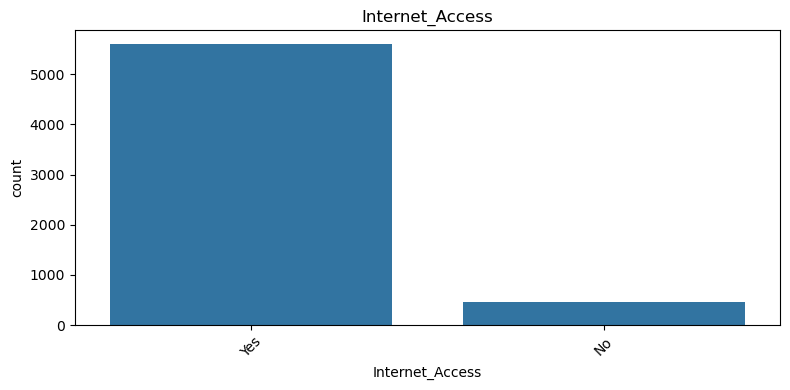

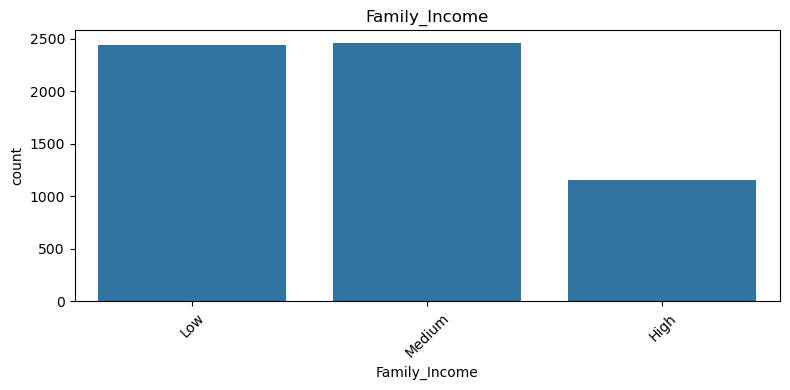

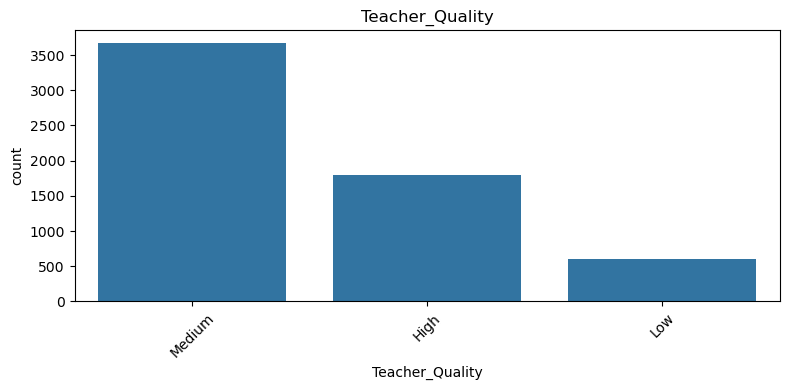

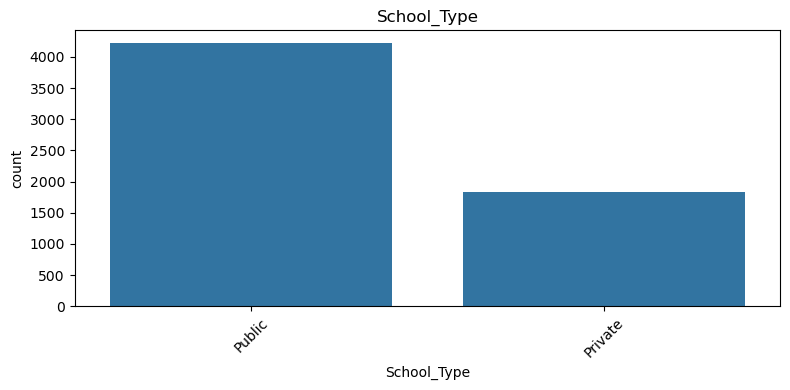

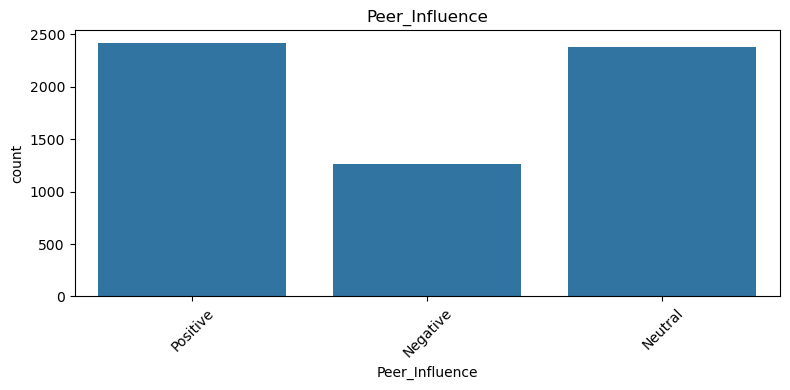

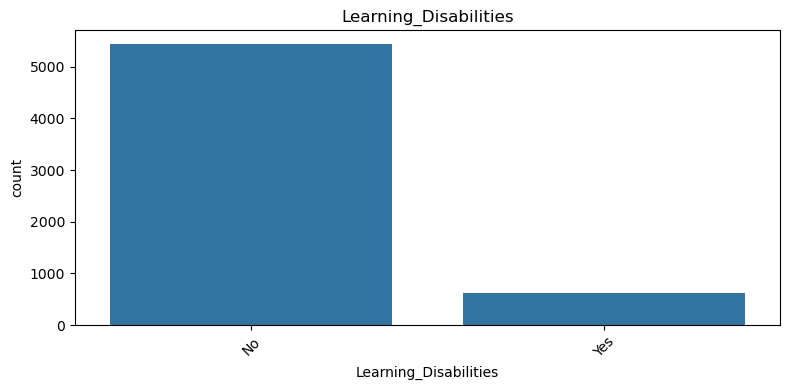

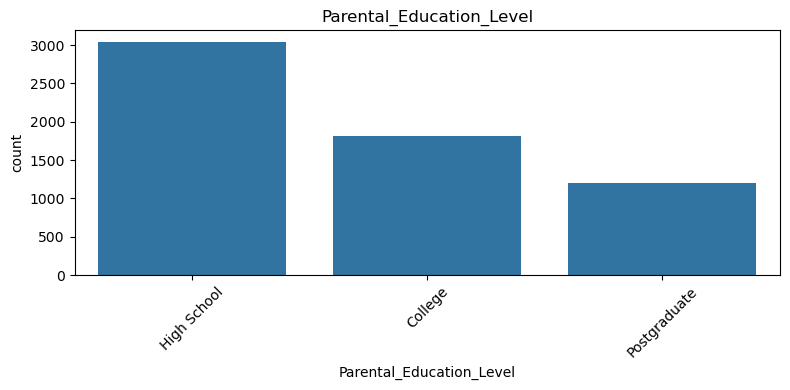

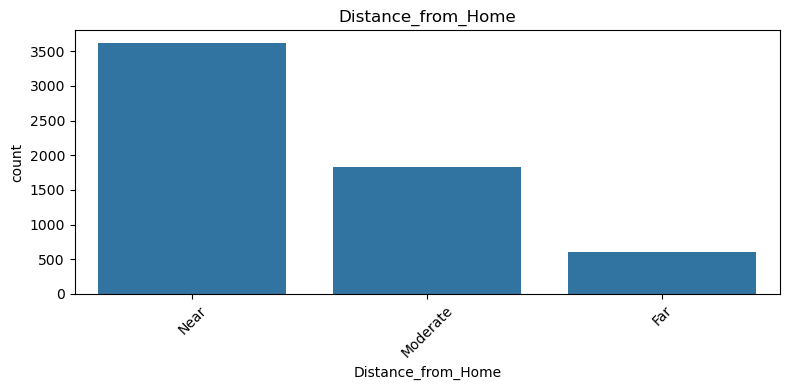

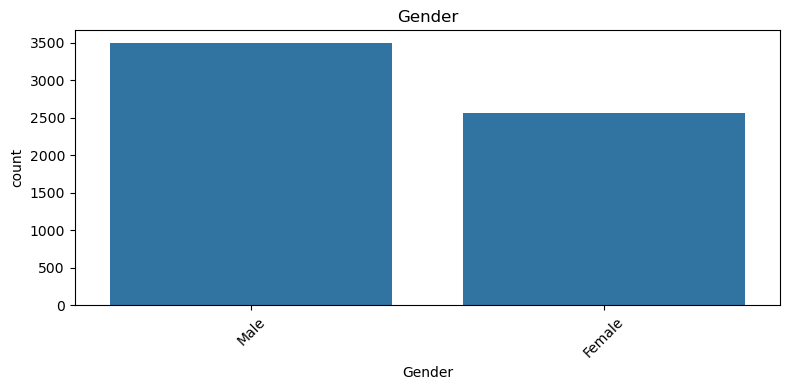

In [45]:
for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

<br> Viewing the unique values in the first 5 rows so to know which columns can change in numeric using LabelEncoder

In [48]:
for col in df.columns:
    unique_vals = df[col].unique()
    print(f"Column: {col}")
    print(unique_vals[:5])

Column: Hours_Studied
[23 19 24 29 25]
Column: Attendance
[84 64 98 89 92]
Column: Parental_Involvement
['Low' 'Medium' 'High']
Column: Access_to_Resources
['High' 'Medium' 'Low']
Column: Extracurricular_Activities
['No' 'Yes']
Column: Sleep_Hours
[ 7  8  6 10  9]
Column: Previous_Scores
[73 59 91 98 65]
Column: Motivation_Level
['Low' 'Medium' 'High']
Column: Internet_Access
['Yes' 'No']
Column: Tutoring_Sessions
[0 2 1 3]
Column: Family_Income
['Low' 'Medium' 'High']
Column: Teacher_Quality
['Medium' 'High' 'Low']
Column: School_Type
['Public' 'Private']
Column: Peer_Influence
['Positive' 'Negative' 'Neutral']
Column: Physical_Activity
[3 4 2 1 5]
Column: Learning_Disabilities
['No' 'Yes']
Column: Parental_Education_Level
['High School' 'College' 'Postgraduate']
Column: Distance_from_Home
['Near' 'Moderate' 'Far']
Column: Gender
['Male' 'Female']
Column: Exam_Score
[67 61 74 71 70]


<br> I can use for all categorical columns to change into numerical column

In [51]:
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6054 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6054 non-null   int64
 1   Attendance                  6054 non-null   int64
 2   Parental_Involvement        6054 non-null   int32
 3   Access_to_Resources         6054 non-null   int32
 4   Extracurricular_Activities  6054 non-null   int32
 5   Sleep_Hours                 6054 non-null   int64
 6   Previous_Scores             6054 non-null   int64
 7   Motivation_Level            6054 non-null   int32
 8   Internet_Access             6054 non-null   int32
 9   Tutoring_Sessions           6054 non-null   int64
 10  Family_Income               6054 non-null   int32
 11  Teacher_Quality             6054 non-null   int32
 12  School_Type                 6054 non-null   int32
 13  Peer_Influence              6054 non-null   int32
 14  Physical_Acti

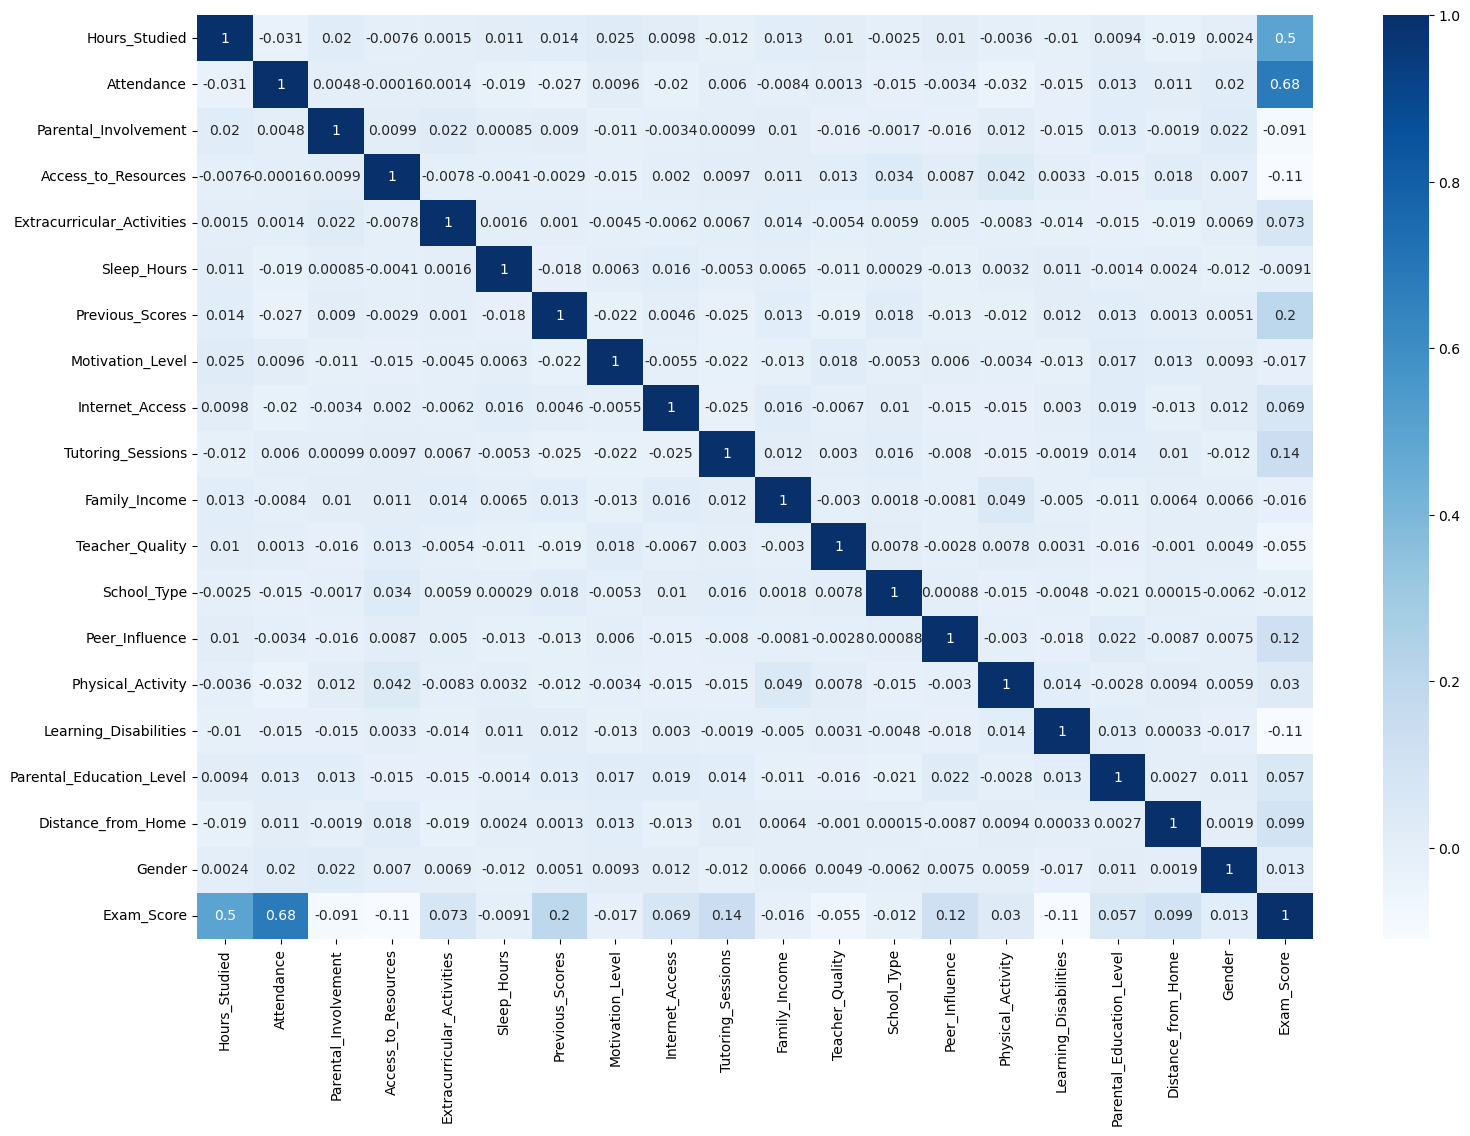

In [55]:
plt.figure(figsize=(18, 12))
sns.heatmap(df.corr(numeric_only = True), cmap="Blues", annot=True) # Correlation of numeric columns 
plt.show()

<br> From this step, I started splitting the dataset and working with models

In [58]:
X = df.drop(columns=['Exam_Score']) # Dropping the target column from dataset
y = df['Exam_Score'] # Selecting the target column 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4843, 19), (1211, 19), (4843,), (1211,))

<br> Next step will be scale the dataset for training the data to LinearRegression

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-1.39079865e-03, -1.29633035e+00, -2.54142389e-01, ...,
         1.57224806e+00,  7.40796156e-01, -1.15546582e+00],
       [-1.21035144e+00, -9.48665719e-01,  8.98302920e-01, ...,
         1.40701274e-01, -7.52202505e-01,  8.65451825e-01],
       [ 6.89443851e-01, -1.12249803e+00, -1.40658770e+00, ...,
        -1.29084551e+00, -7.52202505e-01,  8.65451825e-01],
       ...,
       [-6.92225449e-01, -7.74833404e-01, -1.40658770e+00, ...,
        -1.29084551e+00, -7.52202505e-01, -1.15546582e+00],
       [-1.72847742e+00,  1.57190284e+00,  8.98302920e-01, ...,
        -1.29084551e+00,  7.40796156e-01, -1.15546582e+00],
       [-1.03764277e+00,  8.76573585e-01, -1.40658770e+00, ...,
        -1.29084551e+00, -7.52202505e-01,  8.65451825e-01]])

## 4. Linear Regression

In [64]:
model_lin = LinearRegression() # Logistic Regression model
model_lin.fit(X_train_scaled, y_train) # training the dataset into model
y_pred_lin = model_lin.predict(X_test_scaled) # Predicting the target
print("MSE:", mean_squared_error(y_test, y_pred_lin))
print("MAE:", mean_absolute_error(y_test, y_pred_lin))
print("R^2 Score:", r2_score(y_test, y_pred_lin))

MSE: 1.2733357372389713
MAE: 0.9069776800934738
R^2 Score: 0.873043714350476


<br> The R2 score of the LinearRegression model is 87% which is pretty good, next step will be improving the model throug using PolynomialFeatures

In [67]:
rfe = RFE(estimator=LinearRegression(), n_features_to_select=10)
rfe.fit(X_train_scaled, y_train)
selected_features = X.columns[rfe.support_]
print("Selected features:", selected_features)

Selected features: Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Previous_Scores', 'Internet_Access',
       'Tutoring_Sessions', 'Peer_Influence', 'Learning_Disabilities',
       'Distance_from_Home'],
      dtype='object')


<br> Before using Polynomial Features, used RFE to choose better features and splitted the dataset based on the selected 10 columns,
<br> I changes the n_features_to_select 5 but the R2 score of the model decreased because of this features choosen 10 columns. 

In [70]:
X_rfe = X[selected_features]
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled_rfe = scaler.fit_transform(X_train_rfe)
X_test_scaled_rfe = scaler.transform(X_test_rfe)

<br> Splitted the dataset again but variable names changed so in the next models not to interect RFE dataset to other models.

In [73]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train_rfe = poly.fit_transform(X_train_scaled_rfe)
X_poly_test_rfe = poly.transform(X_test_scaled_rfe)
poly_lr = LinearRegression()
poly_lr.fit(X_poly_train_rfe, y_train_rfe)
y_pred_poly_rfe = poly_lr.predict(X_poly_test_rfe)
print("MSE:", mean_squared_error(y_test, y_pred_poly_rfe))
print("R^2 Score:", r2_score(y_test, y_pred_poly_rfe))


MSE: 0.7433888111159691
R^2 Score: 0.9258813842315126


<br> The R2 score of PolunomialFeatures with LinearRegression using the features of choosen features RFE (10 columns),
<br> The R2 score more better then from start of the model LinearRegression. 
<br> Next step will be using Polynomial Features using all features, it means without RFE and see the results.

In [76]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train_scaled)
X_poly_test = poly.transform(X_test_scaled)

poly_lr = LinearRegression()
poly_lr.fit(X_poly_train, y_train)
y_pred_poly = poly_lr.predict(X_poly_test)

print("Polynomial MSE:", mean_squared_error(y_test, y_pred_poly))
print("Polynomial MAE:", mean_absolute_error(y_test, y_pred_poly))
print("Polynomial R^2 Score:", r2_score(y_test, y_pred_poly))

Polynomial MSE: 0.11312987094915769
Polynomial MAE: 0.28196155601646367
Polynomial R^2 Score: 0.9887205331699415


<br> The R2 score much better when using all features in PolynomialFeatures without RFE.

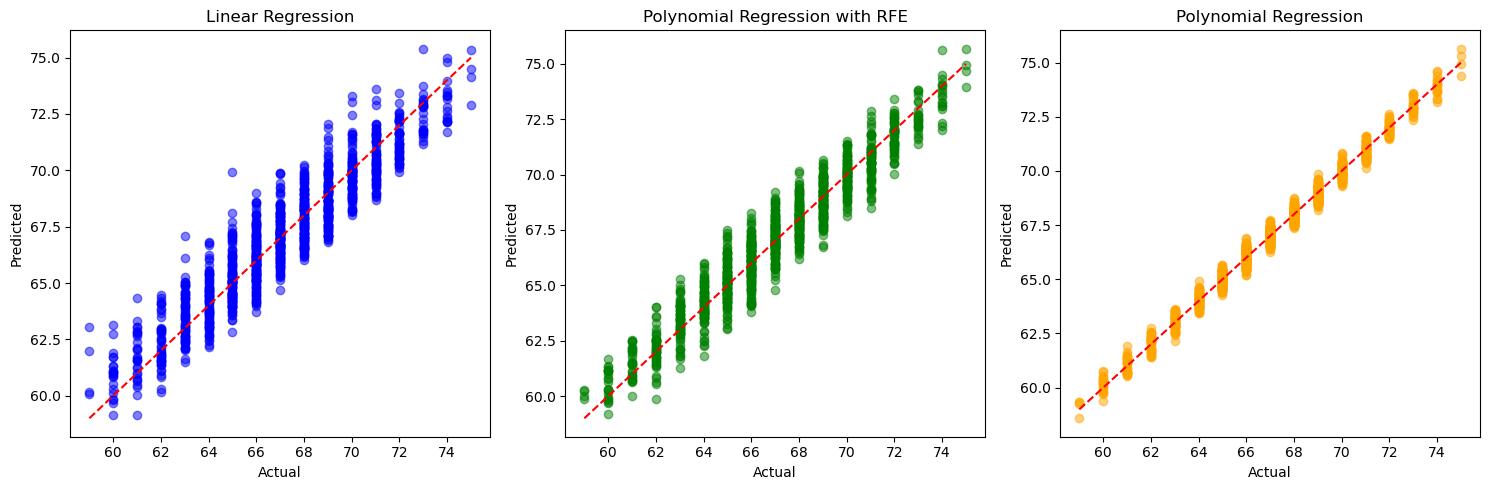

In [79]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1) # Linear Regression
plt.scatter(y_test, y_pred_lin, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")
plt.subplot(1, 3, 2) # Polynomial Regression with RFE
plt.scatter(y_test, y_pred_poly_rfe, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Polynomial Regression with RFE")
plt.subplot(1, 3, 3) # Polynomial Regression
plt.scatter(y_test, y_pred_poly, alpha=0.5, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Polynomial Regression")
plt.tight_layout()
plt.show()

<br> The comparison of the model in three situations.
<br> In the first graph showing the actual and predicted values with simple LinearRegression model.
<br> In the second graph showing the Linear Regression model with opitimization RFE and PolynomialFeature and predicted values are more accurate than first graph. 
<br> Last graph showing the Linear Regression model with opitmization Polynomial Regression with all features of dataset without using RFE and the accuracy of predicted values much higher than first and second graph.

## 5. RandomForestClassifier

<br> In this part, using the model RandomForestRegressor try to predict the target value based on the dataset.

In [84]:
model_rfr = RandomForestRegressor(random_state=42)
model_rfr.fit(X_train, y_train)
y_pred_rfr = model_rfr.predict(X_test)
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rfr))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rfr))
print("Random Forest R^2:", r2_score(y_test, y_pred_rfr))

Random Forest MSE: 1.3903453344343522
Random Forest MAE: 0.940165152766309
Random Forest R^2: 0.861377424454707


<br> The R2 score of the RandomForestRegressor is 86% and next step will be using GridSearchCV to improve the models prediction.

In [87]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=model_rfr, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_
y_pred_rfr_grid = best_rf.predict(X_test)

C:\Users\PcShop2024\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
144 fits failed out of a total of 288.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
47 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\PcShop2024\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\PcShop2024\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\PcShop2024\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\PcShop2024\a

Best Parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [88]:
print("Random Forest MSE:", mean_squared_error(y_test, y_pred_rfr_grid))
print("Random Forest MAE:", mean_absolute_error(y_test, y_pred_rfr_grid))
print("Random Forest R^2:", r2_score(y_test, y_pred_rfr_grid))

Random Forest MSE: 1.2857291213643454
Random Forest MAE: 0.8885611065235341
Random Forest R^2: 0.8718080480849576


<br> After using GridSearchCV in RandomForestRegression the R2 score increased to 1 percentage.
<br> Next step will be scatter graph for the model RandomForestRegression and models prediction after GridSearchCV.

Text(0.5, 1.0, 'RandomForestRegression after GridSearchCV')

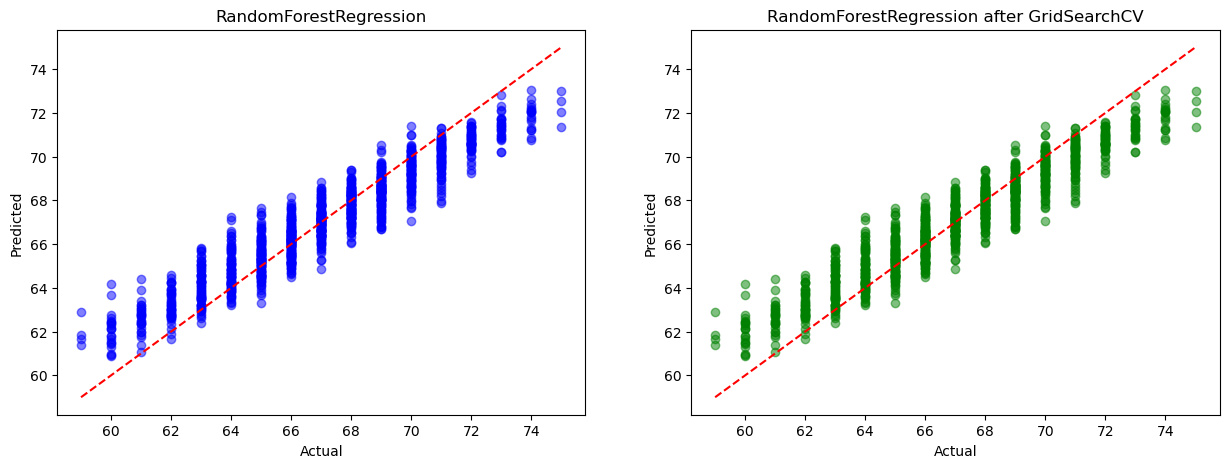

In [92]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1) # RandomForestRegression
plt.scatter(y_test, y_pred_rfr_grid, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("RandomForestRegression")
plt.subplot(1, 2, 2) # RandomForestRegression after GridSearchCV
plt.scatter(y_test, y_pred_rfr_grid, alpha=0.5, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("RandomForestRegression after GridSearchCV")

## 5. KNN

In this part, I will use KNN model to predict the target, usually KNN used for classified problems but as my dataset is regression problem I will use KNeighborsRegressor model to predict. 

In [98]:
model_knn = KNeighborsRegressor(n_neighbors=5) # Predicting the target with model KNN with scaling the dataset
model_knn.fit(X_train_scaled, y_train)
y_pred_knn = model_knn.predict(X_test_scaled)
print("KNN MSE:", mean_squared_error(y_test, y_pred_knn))
print("KNN MAE:", mean_absolute_error(y_test, y_pred_knn))
print("KNN R^2 Score:", r2_score(y_test, y_pred_knn))

KNN MSE: 3.7530966143682907
KNN MAE: 1.5499587118084233
KNN R^2 Score: 0.6258023772448478


<br> In the first part I used scaled data with the KNN model but R2 score is low, Scaling not always helps so I tried without scaling
<br> the dataset and the prediction of the model and R2 score increased to 76%.

In [101]:
knn_regressor = KNeighborsRegressor(n_neighbors=5) # Predicting the target with model KNN without scaling the dataset
knn_regressor.fit(X_train, y_train)
y_pred_knn = knn_regressor.predict(X_test)
print("KNN MSE:", mean_squared_error(y_test, y_pred_knn))
print("KNN MAE:", mean_absolute_error(y_test, y_pred_knn))
print("KNN R^2 Score:", r2_score(y_test, y_pred_knn))

KNN MSE: 2.318843930635838
KNN MAE: 1.2104046242774569
KNN R^2 Score: 0.7688026780173383


<br> I tried to improve the KNN model with GridSearchCV but got negative R2 score, tried multply times with different methods but score did not changed.

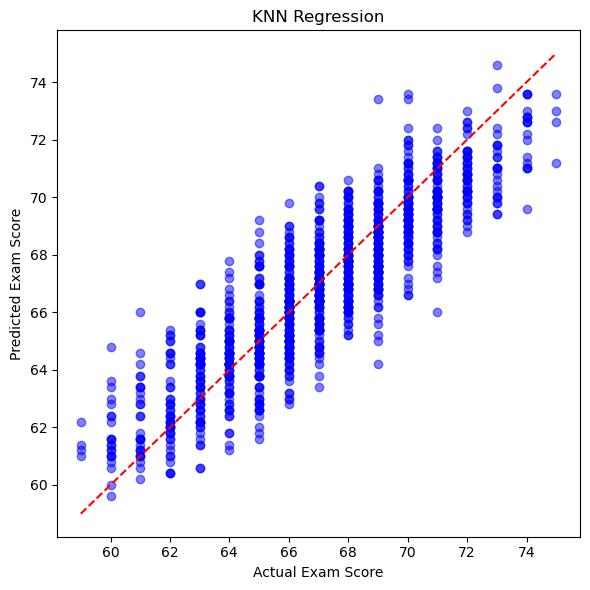

In [104]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_knn, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("KNN Regression")
plt.tight_layout()
plt.show()

## 7. Comparison

<br> In this part, I will show the R2 score comparison with all models which were used in this project.

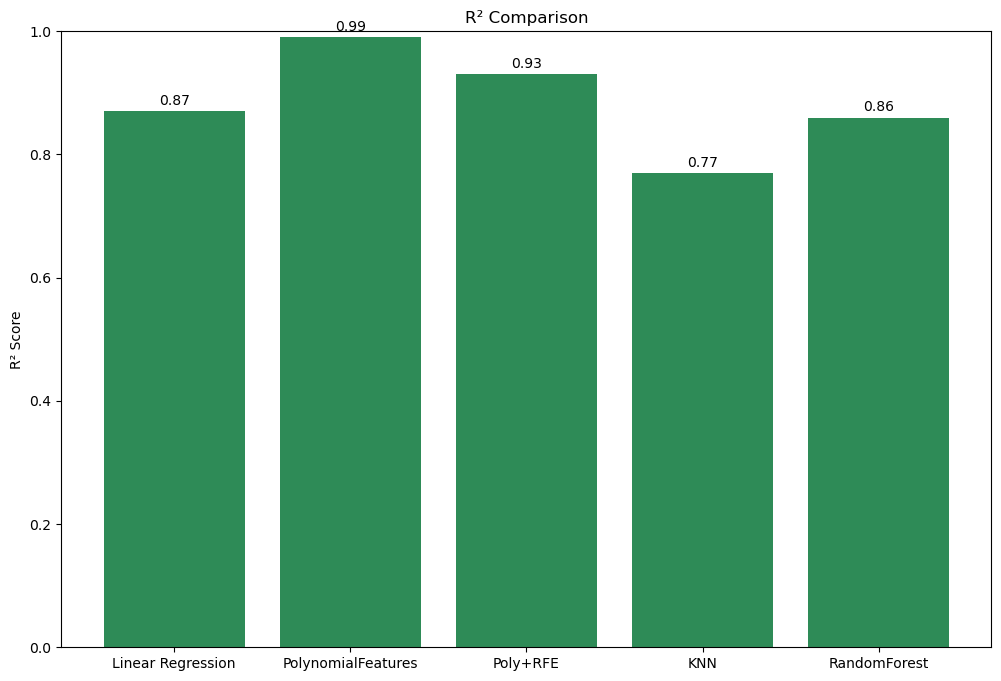

In [108]:
plt.figure(figsize=(12, 8))
model_names = ["Linear Regression", "PolynomialFeatures", "Poly+RFE", "KNN", "RandomForest"]
r2_list = [0.87, 0.99, 0.93, 0.77, 0.86]  # Replace with your actual R² values
plt.bar(model_names, r2_list, color='seagreen')
plt.title("R² Comparison")
plt.ylabel("R² Score")
for i in range(len(model_names)):
    plt.text(i, r2_list[i] + 0.01, f"{r2_list[i]:.2f}", ha='center')
plt.ylim(0, 1)
plt.show()

<br> As can be seen that, from the graphss best R2 score is in PolynomialFeatures with LinearRegression.

##  6. Conclusion
In overall, there are many other models can be used to predict the target as Gaussian Naive Bayes or DecisionTreeRegression. There is no point of using many models with small dataset because any model accuracy or r2 score can be high but it will not meant that model is good. This assigment was challenging because choosing the normal dataset was problem, I worked on other 2 dataset similer to like this but the correlation of columns was so bad that model accuracy was less than 50%, in the end by researching the Kaggle I decided to work on this dataset to predict the exam scores based on the student perforamance. 